# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 23 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [43]:
N = 100
THETA = 10
LAMBDA = 3
ALPHA = 0.95

def draw_confidence_interval(sample, estimates, confidence_intervals, title, distr):
    left_bounds = np.array([interval[0] for interval in confidence_intervals])
    right_bounds = np.array([interval[1] for interval in confidence_intervals])

    x = np.linspace(1, N, N)
    plt.figure(figsize=(15, 10))
    plt.title('График доверительного интервала для {} от оценки {}'.format(distr, title))
    plt.plot(x, estimates, color='r', label=('θ* = {}'.format(title)))
    plt.fill_between(x, left_bounds , right_bounds, alpha=0.5, label=('Доверительный интервал от θ*'))
    plt.scatter(
        x, 
        sample, 
        alpha=0.5, color = 'b', label='$X_i$'
    )
    plt.xlabel('Размер выборки')
    plt.ylabel('θ*')
    plt.legend()
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

Доверительный интервал для оценки $\overline X$

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Доверительный интервал:
$$
(X_{(n)}; \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})
$$

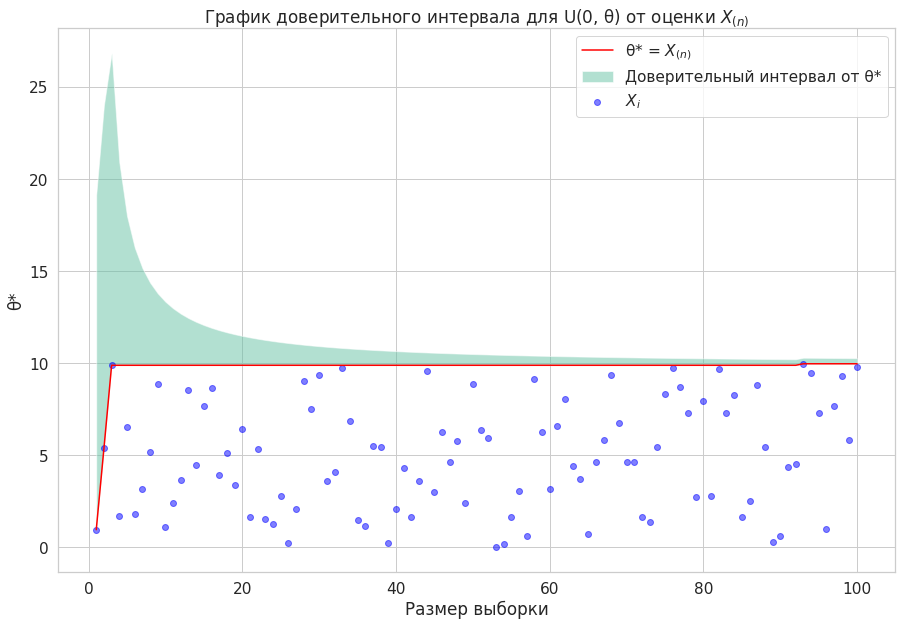

In [46]:
def get_confidence_interval_uniform(sample):
    L = sample.max()
    R = sample.max() / ((1 - ALPHA) ** (1. / len(sample)))
    return (L, R)

# генерируем выборку
uniform_sample = sps.uniform(loc=0, scale=THETA).rvs(size=N)

# считаем оценку
uniform_estimates = np.array([uniform_sample[0:n].max() for n in range(1, N + 1)])

# находим доверительные интервалы
uniform_confidence_intervals = np.array([get_confidence_interval_uniform(uniform_sample[0:n]) for n in range(1, N + 1)])

draw_confidence_interval(uniform_sample, uniform_estimates, uniform_confidence_intervals, "$X_{(n)}$", "U(0, θ)")

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Доверительный интервал: 
$$
\left(\mu - z_{\frac{\alpha + 1}{2}}\frac{\pi}{2\sqrt{n}}; \mu + z_{\frac{\alpha + 1}{2}}\frac{\pi}{2\sqrt{n}}\right)
$$
Где, $z_{\frac{\alpha + 1}{2}} - \frac{\alpha + 1}{2}$ - квантиль $N(0, 1)$, $\mu$ - выборочная медиана

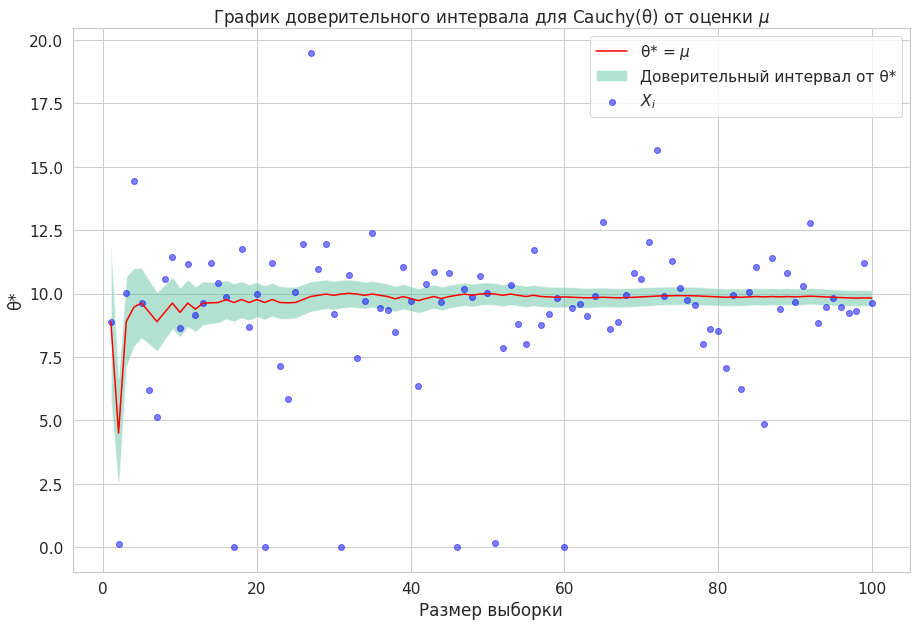

In [67]:
def get_confidence_interval_cauchy(sample):
    quantile = sps.norm.ppf((1 + ALPHA) / 2)
    L = np.median(sample) - quantile * np.pi / (2 * sample.size ** 0.5)
    R = np.median(sample) + quantile * np.pi / (2 * sample.size ** 0.5)
    return (L, R)

# генерируем выборку
cauchy_sample = sps.cauchy(loc=THETA, scale=1).rvs(size=N)

# считаем оценку
cauchy_estimates = np.array([np.median(cauchy_sample[0:n]) for n in range(1, N + 1)])

# находим доверительные интервалы
cauchy_confidence_intervals = np.array([get_confidence_interval_cauchy(cauchy_sample[0:n]) for n in range(1, N + 1)])

# чтобы график доверительных выглядел нагляднее заменим выбросы на 0
filter_sample = lambda x : x if (0 <= x <= 20) else 0
cauchy_sample_truncated = np.array([filter_sample(x) for x in cauchy_sample])

draw_confidence_interval(cauchy_sample_truncated, cauchy_estimates, cauchy_confidence_intervals, "$\mu$", "Cauchy(θ)")

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Доверительный интервал:
$$
(\overline{X} - z_{\frac{\alpha + 1}{2}}\frac{\overline{X}}{\sqrt{n}}; \overline{X} + z_{\frac{\alpha + 1}{2}}\frac{\overline{X}}{\sqrt{n}};)
$$
Где, $z_{\frac{\alpha + 1}{2}} - \frac{\alpha + 1}{2}$ - квантиль $N(0, 1)$

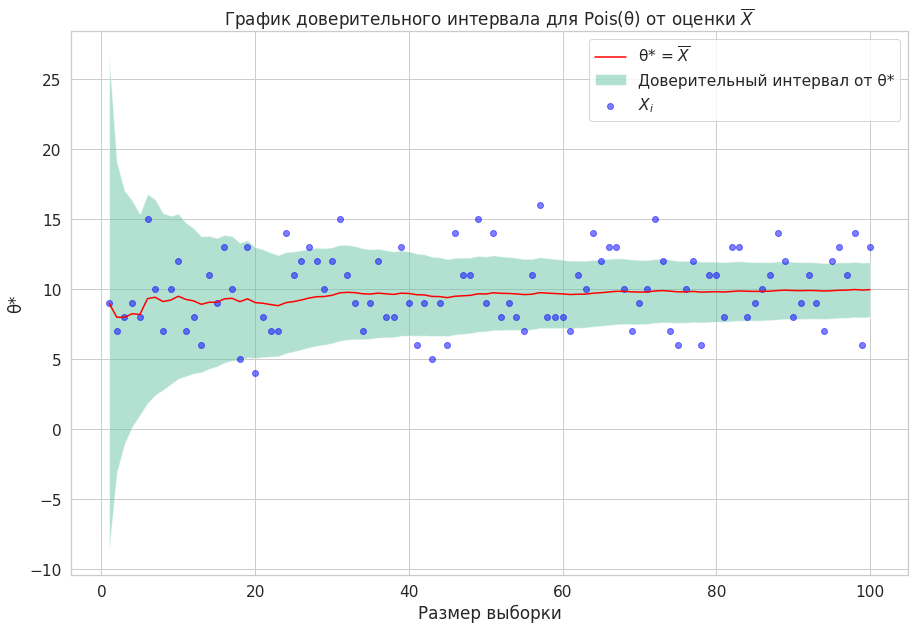

In [64]:
def get_confidence_interval_poisson(sample):
    quantile = sps.norm.ppf((1 + ALPHA) / 2)
    L = np.mean(sample) - quantile * np.mean(sample) / (sample.size ** 0.5)
    R = np.mean(sample) + quantile * np.mean(sample) / (sample.size ** 0.5)
    return (L, R)

# генерируем выборку
poisson_sample = sps.poisson(mu=THETA).rvs(size=N)

# считаем оценку
poisson_estimates = np.array([np.mean(poisson_sample[0:n]) for n in range(1, N + 1)])

# находим доверительные интервалы
poisson_confidence_intervals = np.array([get_confidence_interval_poisson(poisson_sample[0:n]) for n in range(1, N + 1)])

draw_confidence_interval(poisson_sample, poisson_estimates, poisson_confidence_intervals, "$\overline{X}$", "Pois(θ)")

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна (видимо $\widehat{\theta} = \frac{\lambda}{\overline{X}}$)

Доверительный интервал:
$$
\left( \frac{\lambda - z_{\frac{\alpha + 1}{2}} \sqrt{\frac{\lambda}{n}}}{\overline{X}}; \frac{\lambda + z_{\frac{\alpha + 1}{2}} \sqrt{\frac{\lambda}{n}}}{\overline{X}} \right)
$$
Где, $z_{\frac{\alpha + 1}{2}} - \frac{\alpha + 1}{2}$ - квантиль $N(0, 1)$

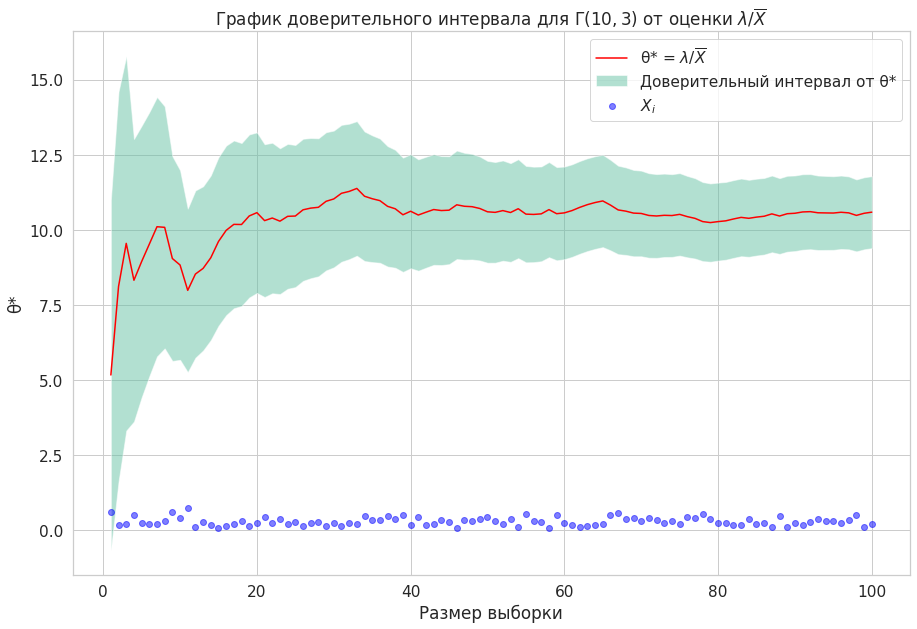

In [65]:
def get_confidence_interval_gamma(sample):
    quantile = sps.norm.ppf((1 + ALPHA) / 2)
    L = (LAMBDA - quantile * (LAMBDA * 1.0 / sample.size)**0.5) / np.mean(sample)
    R = (LAMBDA + quantile * (LAMBDA * 1.0 / sample.size)**0.5) / np.mean(sample)
    return (L, R)

# генерирем выборку
gamma_sample = sps.gamma(a=LAMBDA, scale=1./THETA).rvs(size=N)

# считаем оценку
gamma_estimates = np.array([LAMBDA / np.mean(gamma_sample[0:n]) for n in range(1, N + 1)])

# находим доверительные интервалы
gamma_confidence_intervals = np.array([get_confidence_interval_gamma(gamma_sample[0:n]) for n in range(1, N + 1)])

draw_confidence_interval(gamma_sample, gamma_estimates, gamma_confidence_intervals, "$\lambda / \overline{X}$", "$\Gamma(10, 3)$")

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод:**

1. $U(0, 10)$, оценка $\widehat{\theta} = X_{(n)}$:
    - При малых размерах выборки интервал довольно широкий, но при больших размерах выборки доверительный интервал имеет высокую точность и быстро сходится к истиному значению параметра $\theta$
2. $Cauchy(10)$, оценка — медиана:
    - Доверительный интервал имеет высокую точность и сходится к истиному значению параметра $\theta$
3. $Pois(10)$, оценка $\widehat{\theta} = \overline{X}$:
    - При малых размерах выборки интервал довольно широкий, но с ростом выборки растет точность. Сходится к истиному значению параметра $\theta$
4. $\Gamma(10, 3)$, оценка $\widehat{\theta} = \frac{\lambda}{\overline{X}}$:
    - Доверительный интервал имеет высокую точность и сходится к истиному значению параметра $\theta$

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [78]:
number_samples = 1000
N = 100
THETA = 10

def generate_samples(distr):
    return np.array([distr.rvs(size=N) for i in range(number_samples)])

def in_interval(interval):
    return interval[0] <= THETA <= interval[1]

def calc_probability(confidence_intervals):
    number_of_hits = np.array([ in_interval(interval) for interval in confidence_intervals]).sum()
    return ((number_of_hits*1.0) / number_samples)

### Равномерное распределение

In [79]:
# генерируем 1000 выборк
uniform_samples = generate_samples(sps.uniform(loc=0, scale=THETA))
# находим доверительные интервалы
confidence_intervals = np.array([get_confidence_interval_uniform(sample) for sample in uniform_samples])
uniform_prob = calc_probability(confidence_intervals)
print(uniform_prob)

0.954


### Распределение Коши

In [81]:
# генерируем 1000 выборк
cauchy_samples = generate_samples(sps.cauchy(loc=THETA, scale=1))
# находим доверительные интервалы
confidence_intervals = np.array([get_confidence_interval_cauchy(sample) for sample in cauchy_samples])
cauchy_prob = calc_probability(confidence_intervals)
print(cauchy_prob)

0.947


### Распределение Пуассона

In [82]:
pois_samples = generate_samples(sps.poisson(mu=THETA))
confidence_intervals = np.array([get_confidence_interval_poisson(sample) for sample in pois_samples])
pois_prob = calc_probability(confidence_intervals)
print(pois_prob)

1.0


### Гамма-распределение

In [83]:
gamma_samples = generate_samples(sps.gamma(a=LAMBDA, scale=1./THETA))
confidence_intervals = np.array([get_confidence_interval_gamma(sample) for sample in gamma_samples])
gamma_prob = calc_probability(confidence_intervals)
print(gamma_prob)

0.953


In [84]:
print("uniform: {}".format(uniform_prob))
print("cauchy: {}".format(cauchy_prob))
print("pois: {}".format(pois_prob))
print("gamma: {}".format(gamma_prob))

uniform: 0.954
cauchy: 0.947
pois: 1.0
gamma: 0.953


Сделайте выводы.

**Вывод:**

Вероятность попадание истиного значения в доверительный интервал во всех случаях равна примерно 0.95, а значит данные доверительные интервалы дают хорошее приближение

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


**Решение:**

1. Найдем точный доверительный интервал:
   - Положим $G(X, a) = \frac{\sqrt{n}(\overline{X} - a)}{S}$, где $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \overline{X})^2$
   - $G(X, a)$ - имеет распределние Стьюдента с $k - 1$ степенями свободы ($t_{n-1}$)
   - Тогда
   $$
   \alpha = \frac{1 + \alpha}{2} - \frac{1 - \alpha}{2} = P\left( t_{n-1}(\frac{1 + \alpha}{2}) < G(X, a) < t_{n-1}(\frac{1 + \alpha}{2})\right) = 
   $$
   
   $$
   = P\left(\overline{X} - \frac{S t_{n-1}(\frac{1 + \alpha}{2})}{\sqrt{n}}  < a < \overline{X} - \frac{S t_{n-1}(\frac{1 - \alpha}{2})}{\sqrt{n}})\right)
   $$
   
   где $t_{n-1}(\frac{1 + \alpha}{2}) ; t_{n-1}(\frac{1 - \alpha}{2})$ -$ \frac{1 + \alpha}{2}$ и $\frac{1 - \alpha}{2}$ квантили распределераспределния $t_{n-1}$

2. Найдем асимптотический доверительный интервал:
    - По ЦПТ:
    $$
    \frac{\sqrt{n}(\overline{X} - a)}{\sigma} \xrightarrow{d_a} \xi \sim N(0, 1)
    $$
    - По теореме о наследовании сходимости: $\frac{\sigma(a)}{S}\xrightarrow{P_a} 1$, где S - выборочная дисперсия
    - По лемме Слуцкого:
    $$
    \sqrt{n}\frac{\overline{X} - a}{S} \xrightarrow{d_a} \xi
    $$
    - Тогда имеем
    $$
    \lim_{n \rightarrow \infty}  P\left(\overline{X} - \frac{S u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}  < a < \overline{X} - \frac{S u_{\frac{1 - \alpha}{2}}}{\sqrt{n}})\right) = \alpha
    $$
    где $u_{\frac{1 + \alpha}{2}}$ u $u_{\frac{1 - \alpha}{2}}$ - $\frac{1 + \alpha}{2}$и $\frac{1 - \alpha}{2}$ квантили $N(0, 1)$ соответственно
    
**Ответ:**

Точный: $$\left(\overline{X} - \frac{S t_{n-1}(\frac{1 + \alpha}{2})}{\sqrt{n}}  ; \overline{X} - \frac{S t_{n-1}(\frac{1 - \alpha}{2})}{\sqrt{n}})\right)$$

Асимптотический:
$$
\left(\overline{X} - \frac{S u_{\frac{1 + \alpha}{2}}}{\sqrt{n}};\overline{X} - \frac{S u_{\frac{1 - \alpha}{2}}}{\sqrt{n}})\right)
$$

    

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [85]:
N = 30
a = 0

def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    S = (np.mean(sample ** 2) - np.mean(sample)**2)
    t_quantile1 = sps.t.ppf((alpha + 1) / 2, len(sample) - 1)
    t_quantile2 = sps.t.ppf((1 - alpha) / 2, len(sample) - 1)
    L = np.mean(sample) - S * t_quantile1 / len(sample) ** 0.5
    R = np.mean(sample) - S * t_quantile2 / len(sample) ** 0.5
    return (L, R)

In [86]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    S = (np.mean(sample ** 2) - np.mean(sample)**2)
    quantile1 = sps.norm.ppf((alpha + 1) / 2)
    quantile2 = sps.norm.ppf((1 - alpha) / 2)
    L = np.mean(sample) - S * quantile1 / len(sample) ** 0.5
    R = np.mean(sample) - S * quantile2 / len(sample) ** 0.5
    return (L, R)


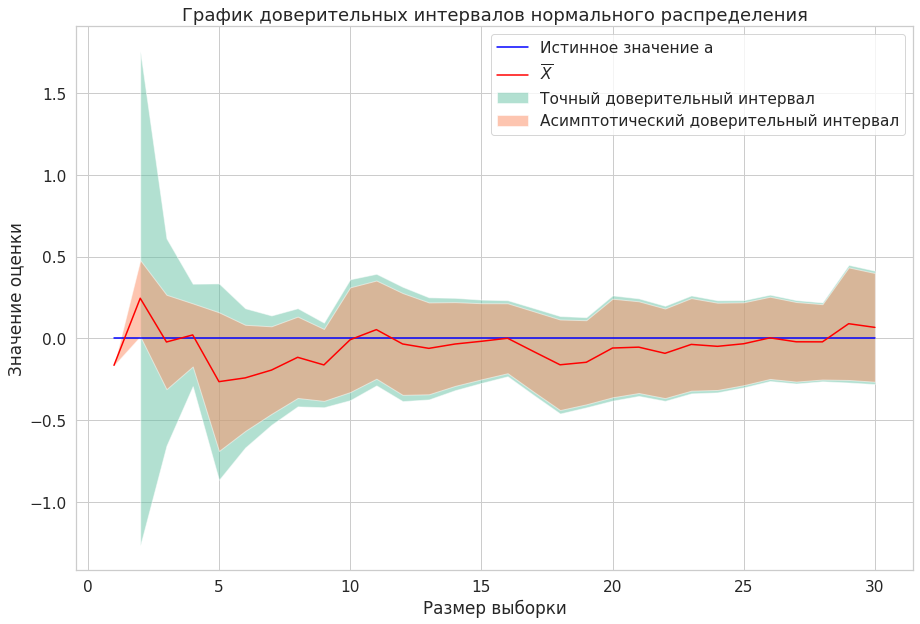

In [91]:
sample = sps.norm().rvs(size=N)

conf_intervals = np.array([
    calculate_conf_interval(sample[0:n]) for n in range(1, N + 1)
])
asymptotic_conf_intervals = np.array([
    calculate_asymptotic_conf_interval(sample[0:n]) for n in range(1, N + 1)
])

left_bounds_conf_intervals = np.array([interval[0] for interval in conf_intervals])
right_bounds_conf_intervals = np.array([interval[1] for interval in conf_intervals])

left_bounds_asymptotic_conf_intervals = np.array([interval[0] for interval in asymptotic_conf_intervals])
right_bounds_asymptotic_conf_intervals = np.array([interval[1] for interval in asymptotic_conf_intervals])

estimates = np.array([np.mean(sample[0:n]) for n in range(1, N + 1)])

plt.figure(figsize=(15, 10))
plt.title('График доверительных интервалов нормального распределения', fontsize=18)

x = np.linspace(1, N, N)
plt.plot(x, np.zeros(N)+a, color='b', label=('Истинное значение a'))
plt.plot(x, estimates, color='r', label=('$\overline{X}$'))
plt.fill_between(
                 x, 
                 left_bounds_conf_intervals , 
                 right_bounds_conf_intervals,
                 alpha=0.5,
                 label='Точный доверительный интервал'
                )
plt.fill_between(
                x, 
                left_bounds_asymptotic_conf_intervals , 
                right_bounds_asymptotic_conf_intervals,
                alpha=0.5,
                label='Асимптотический доверительный интервал')
     
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

**Вывод:**

Для асимптотического ДИ при малых размерах выборки мы не можем с увереностью сказать, что значение параметра в 95% случаях будет попадать в этот ДИ, поэтому если выборка не очень большая, то лучше использовать точный доверительный интервал, иначе - асмптотический.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [78]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /home/tanya/Notebooks/stat/city_day.csv
2.57MB [00:01, 1.90MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [92]:
import pandas as pd

data = pd.read_csv("city_day.csv", parse_dates=[1])
data = data[["City", "Date", "AQI"]]
data.head(5)

,City,Date,AQI
0,Ahmedabad,2015-01-01,NaN
1,Ahmedabad,2015-01-02,NaN
2,Ahmedabad,2015-01-03,NaN
3,Ahmedabad,2015-01-04,NaN
4,Ahmedabad,2015-01-05,NaN


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [93]:
data["Month"] = pd.DatetimeIndex(data["Date"]).month
data["Year"] = pd.DatetimeIndex(data["Date"]).year

data.head(5)

,City,Date,AQI,Month,Year
0,Ahmedabad,2015-01-01,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,1,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [94]:
mumbai = data[(data.City == 'Mumbai') & ((data.Year > 2018) | ((data.Year == 2018) & (data.Month > 6)))]
kolkata = data[(data.City == 'Kolkata') & ((data.Year > 2018) | ((data.Year == 2018) & (data.Month > 6)))]

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [95]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return np.array(df[(df.Year == year) & (df.Month == month)]["AQI"])

In [96]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    return np.array([np.random.choice(sample, len(sample)) for i in range(k)])

In [97]:
import math

def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    k = 1000
    bootstrap_samples = get_bootstrap_samples(sample)
    estimates = np.array([estimator(bootstrap_sample) for bootstrap_sample in bootstrap_samples])
    estimates = np.sort(estimates)
    
    L = estimates[math.floor(k * (1 + alpha) / 2)]
    R = estimates[math.ceil(k * (1 - alpha) / 2)]
    return (L, R)

In [98]:
def get_conf_intervals(df):
    '''  
    Построение бутстрепных доверительных интервалов для среднего значения AQI 
    для каждого месяца с июля 2018 по июнь 2020
    '''
    conf_intervals = []

    for year in [2018, 2019, 2020]:
        for month in range(1, 13):
            if (year == 2018 and month < 7 or year == 2020 and month > 6):
                pass
            else:
                aqi_values = get_dataset_by_month(df, year, month)
                aqi_values = aqi_values[~np.isnan(aqi_values)]
                interval = bootstrap_conf_interval(aqi_values)
                conf_intervals.append(interval)
    return np.array(conf_intervals)


def get_true_mean_aqi(df):
    '''
    Получения истинного среднего значения AQI для каждого месяца с июля 2018 по июнь 2020
    '''
    mean = []

    for year in [2018, 2019, 2020]:
        for month in range(1, 13):
            if (year == 2018 and month < 7 or year == 2020 and month > 6):
                pass
            else:
                aqi_values = get_dataset_by_month(df, year, month)
                aqi_values = aqi_values[~np.isnan(aqi_values)]
                mean.append(np.mean(aqi_values))
    return np.array(mean)
                            


Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

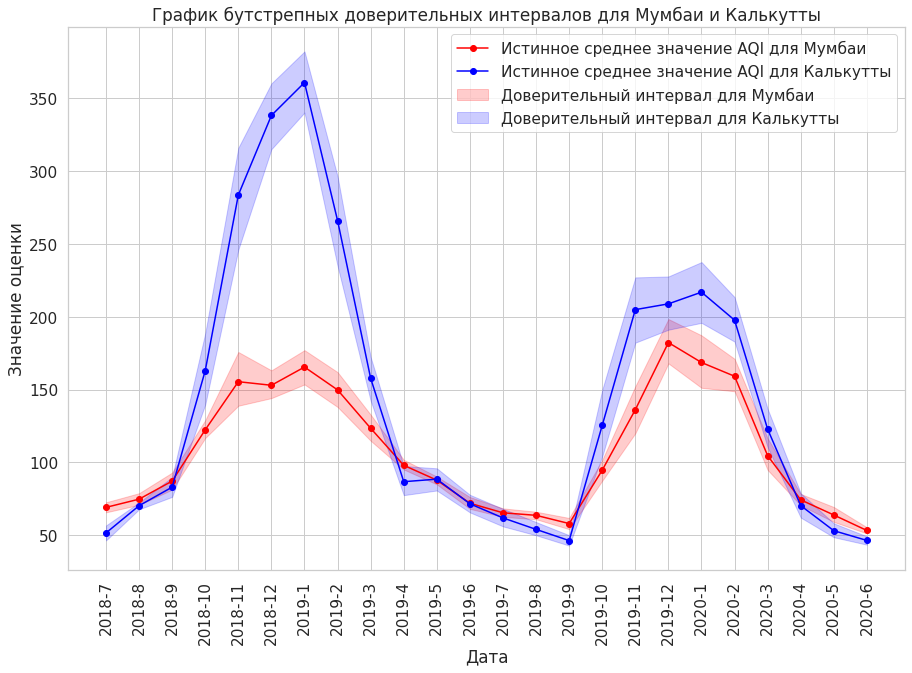

In [99]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

# Находим доверительные интервалы для Мумбаи
mumbai_conf_intervals = get_conf_intervals(mumbai)
mumbai_left_bounds = np.array([interval[0] for interval in mumbai_conf_intervals])
mumbai_right_bounds = np.array([interval[1] for interval in mumbai_conf_intervals])
# Находим истинное среднее для Мумбаи
mumbai_true_mean_aqi = get_true_mean_aqi(mumbai)

# Находим доверительные интервалы для Калькутты
kolkata_conf_intervals = get_conf_intervals(kolkata)
kolkata_left_bounds = np.array([interval[0] for interval in kolkata_conf_intervals])
kolkata_right_bounds = np.array([interval[1] for interval in kolkata_conf_intervals])
# Находим истинное среднее для Калькутты
kolkata_true_mean_aqi = get_true_mean_aqi(kolkata)

plt.figure(figsize=(15, 10))
plt.title('График бутстрепных доверительных интервалов для Мумбаи и Калькутты')

x = np.linspace(1, 24, 24)
plt.plot(x, mumbai_true_mean_aqi, '-o', color='r', label=('Истинное среднее значение AQI для Мумбаи'))
plt.fill_between(x, mumbai_left_bounds , mumbai_right_bounds, color='r', alpha=0.2, label=('Доверительный интервал для Мумбаи'))

plt.plot(x, kolkata_true_mean_aqi, '-o', color='b', label=('Истинное среднее значение AQI для Калькутты'))
plt.fill_between(x, kolkata_left_bounds , kolkata_right_bounds, color='b', alpha=0.2, label=('Доверительный интервал для Калькутты'))
        
plt.xticks(x, labels, rotation=90) 
plt.xlabel("Дата")
plt.ylabel('Значение оценки')
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

**Вывод:**

Среднее значение AQI ведет себя примерно одинаково. Связано это, вероятно, с тем, что географически города расположены не очень далеко друг от друга.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [112]:
def get_points_mean_conf_intervals(df):
    """
    Функция возвращает набор из точек выборки, истинных средних значений AQI и граница доверительных интервалов
    """
    conf_intervals = []
    mean = []
    points = []
    N = 0

    for year in [2019, 2020]:
        month = 4 
        aqi_values = get_dataset_by_month(df, year, month)
        N = len(aqi_values)
        points.append(aqi_values)
        mean.append(np.array([np.mean(aqi_values[0:n]) for n in range(1, len(aqi_values) + 1)]))
        intervals = np.array([bootstrap_conf_interval(aqi_values[0:n]) for n in range(1, len(aqi_values) + 1)])
        conf_intervals.append(intervals)
    
    conf_intervals = np.array(conf_intervals)
    mean = np.array(mean)

    left_bounds_2019 = np.array([interval[0] for interval in conf_intervals[0]])
    right_bounds_2019 = np.array([interval[1] for interval in conf_intervals[0]])

    left_bounds_2020 = np.array([interval[0] for interval in conf_intervals[1]])
    right_bounds_2020 = np.array([interval[1] for interval in conf_intervals[1]])
    return (points, mean, (left_bounds_2019, right_bounds_2019), (left_bounds_2020, right_bounds_2020))


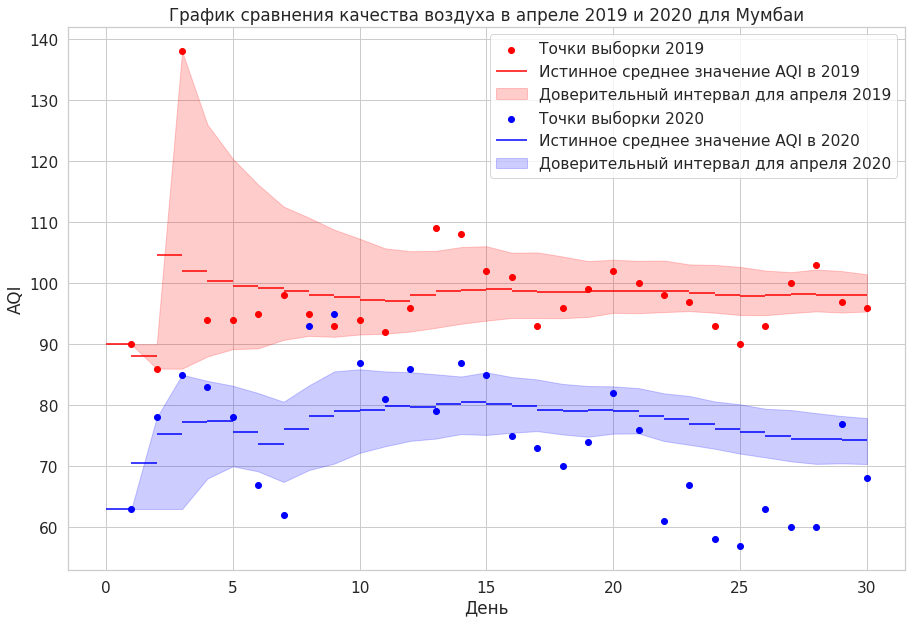

In [113]:
points, mean, (left_bounds_2019, right_bounds_2019), (left_bounds_2020, right_bounds_2020) =get_points_mean_conf_intervals(mumbai)

plt.figure(figsize=(15, 10))
plt.title('График сравнения качества воздуха в апреле 2019 и 2020 для Мумбаи')
x = np.linspace(1, N, N)

plt.scatter(x, points[0], color='r', label=('Точки выборки 2019'))
plt.hlines(y=mean[0], xmin=x-1, xmax=x, color='r', label=('Истинное среднее значение AQI в 2019') )
plt.fill_between(x, left_bounds_2019 , right_bounds_2019, color='r', alpha=0.2, label=('Доверительный интервал для апреля 2019'))

plt.scatter(x, points[1], color='b', label=('Точки выборки 2020'))
plt.hlines(y=mean[1], xmin=x-1, xmax=x, color='b', label=('Истинное среднее значение AQI в 2020') )
plt.fill_between(x, left_bounds_2020 , right_bounds_2020, color='b', alpha=0.2, label=('Доверительный интервал для апреля 2020'))

plt.xlabel("День")
plt.ylabel('AQI')
plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

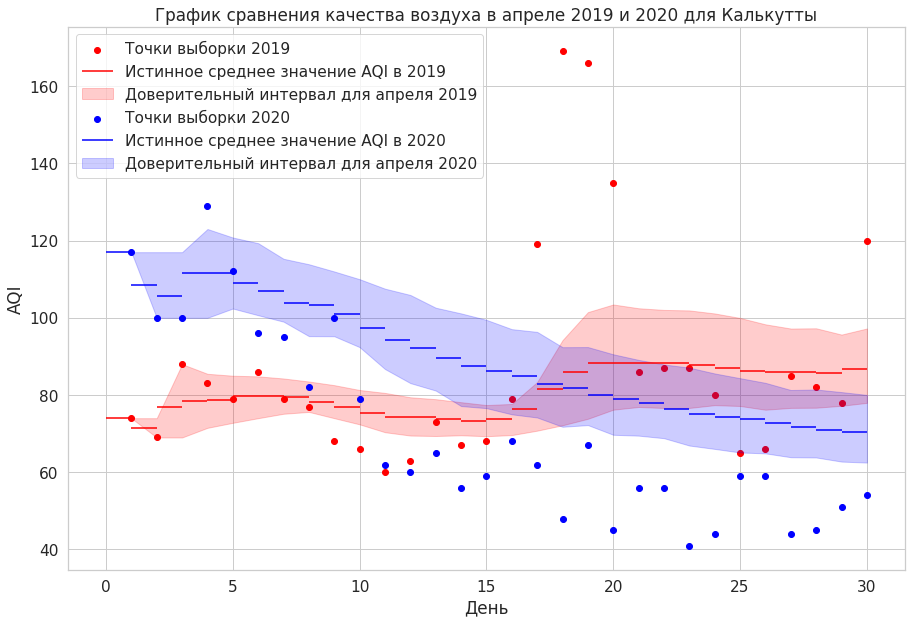

In [114]:
points, mean, (left_bounds_2019, right_bounds_2019), (left_bounds_2020, right_bounds_2020) =get_points_mean_conf_intervals(kolkata)

plt.figure(figsize=(15, 10))
plt.title('График сравнения качества воздуха в апреле 2019 и 2020 для Калькутты')
x = np.linspace(1, N, N)

plt.scatter(x, points[0], color='r', label=('Точки выборки 2019'))
plt.hlines(y=mean[0], xmin=x-1, xmax=x, color='r', label=('Истинное среднее значение AQI в 2019') )
plt.fill_between(x, left_bounds_2019 , right_bounds_2019, color='r', alpha=0.2, label=('Доверительный интервал для апреля 2019'))

plt.scatter(x, points[1], color='b', label=('Точки выборки 2020'))
plt.hlines(y=mean[1], xmin=x-1, xmax=x, color='b', label=('Истинное среднее значение AQI в 2020') )
plt.fill_between(x, left_bounds_2020 , right_bounds_2020, color='b', alpha=0.2, label=('Доверительный интервал для апреля 2020'))

plt.xlabel("День")
plt.ylabel('AQI')
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

Истинное среднее во всех случаях попадает в доверительный интервал.
